In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math


In [3]:
df=pd.read_csv('IRIS.csv')

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.dropna(inplace=True)

In [6]:
df["target"]=[1 if i=='Iris-setosa' else 2 if i=='Iris-virginica' else 3 for i in df["species"]]

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [8]:
def allthetas(X,Y):
    k=Y["target"].nunique()
    Xtemp=np.array(X)
    theta=[]
    for i in range(1,k+1):
        ytemp=[1 if j==i else 0 for j in Y["target"] ]
        Ytemp=np.array(ytemp).T
        thetatemp=logisticreg(Xtemp,Ytemp)
        thetalist=[float(i) for i in thetatemp]
        theta.append(thetalist)
    return theta  

In [9]:
def costfun(theta,X,Y):
    j=0
    m,n=X.shape
    for i in range(0,m):
        if(Y[i]==0):
            j+=((-(math.log(1-hypothesis(np.matmul(theta.T,X[i].reshape(n,1))))))/(m))
        else:
            j+=((-(math.log(hypothesis(np.matmul(theta.T,X[i].reshape(n,1))))))/(m))
    return j

In [10]:
def hypothesis(z):
    ze=-float(z)
    return 1/(1+math.e**(ze))

In [11]:
def derivative(theta,X,Y):
    list1=[]
    m,n=X.shape
    for i in range(0,n):
        sum=0
        for j in range(0,m):
            sum+=((hypothesis(np.matmul(theta.T,X[j].reshape(n,1)))-Y[j])*X[j][i])/m
            
        list1.append(sum)
    print("derivative",np.array(list1).reshape(n,1))
    return np.array(list1).reshape(n,1) 

In [25]:
def logisticreg(X,Y):
    m,n=X.shape
    theta=np.array([0 for i in range(0,n)]).reshape(n,1)
    while True:
        temp=theta-0.01*derivative(theta,X,Y)
        theta=temp.reshape(n,1)
        count=0
        for i in derivative(theta,X,Y):
            if float(i)>=0.04 or float(i)<=-0.04:
                count+=1
                break
        if count==0:
            return theta

In [30]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [12]:
X=pd.DataFrame()

In [13]:
X["x0"]=[1 for i in df["target"]]

In [14]:
X["sepal_length"]=df["sepal_length"]

In [15]:
X["sepal_width"]=df["sepal_width"]

In [16]:
X["petal_length"]=df["petal_length"]

In [18]:
X["petal_width"]=df["petal_width"]

In [19]:
X

,x0,sepal_length,sepal_width,petal_length,petal_width
0,1,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,1,4.7,3.2,1.3,0.2
3,1,4.6,3.1,1.5,0.2
4,1,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,1,6.7,3.0,5.2,2.3
146,1,6.3,2.5,5.0,1.9
147,1,6.5,3.0,5.2,2.0
148,1,6.2,3.4,5.4,2.3


In [21]:
Y=pd.DataFrame()

In [22]:
Y["target"]=df["target"]

In [23]:
Y

,target
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,2
147,2
148,2


In [ ]:
theta1=allthetas(X,Y)

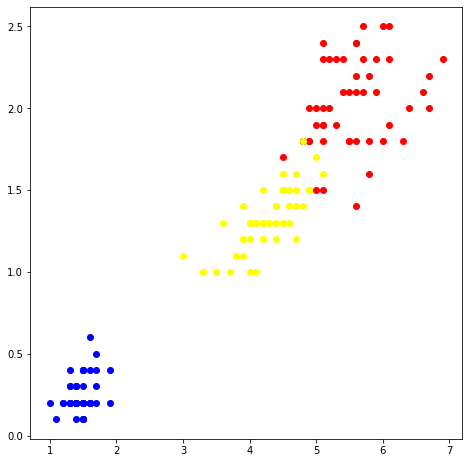

In [24]:
fig=plt.figure(figsize=(6,6))
axes=fig.add_axes([0,0,1,1])
axes.plot(df[df['target']==1]["petal_length"],df[df['target']==1]["petal_width"],marker="o",ls=" ",color='b')
axes.plot(df[df['target']==2]["petal_length"],df[df['target']==2]["petal_width"],marker="o",ls=" ",color='r')
axes.plot(df[df['target']==3]["petal_length"],df[df['target']==3]["petal_width"],marker="o",ls=" ",color='yellow')

In [52]:
X=pd.DataFrame()

In [54]:
X['x0']=[1 for i in df['target']]

In [55]:
X["petal_length"]=df["petal_length"]

In [56]:
X["petal_width"]=df["petal_width"]

In [57]:
X

,x0,petal_length,petal_width
0,1,1.4,0.2
1,1,1.4,0.2
2,1,1.3,0.2
3,1,1.5,0.2
4,1,1.4,0.2
...,...,...,...
145,1,5.2,2.3
146,1,5.0,1.9
147,1,5.2,2.0
148,1,5.4,2.3


In [58]:
Y

,target
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,2
147,2
148,2


In [63]:
theta1=allthetas(X,Y)

derivative [[0.16666667]
 [1.39133333]
 [0.518     ]]
derivative [[0.02315513]
 [0.73791947]
 [0.2980186 ]]
derivative [[0.02315513]
 [0.73791947]
 [0.2980186 ]]
derivative [[-0.03998605]
 [ 0.45680656]
 [ 0.20393528]]
derivative [[-0.03998605]
 [ 0.45680656]
 [ 0.20393528]]
derivative [[-0.07287701]
 [ 0.31302687]
 [ 0.15605765]]
derivative [[-0.07287701]
 [ 0.31302687]
 [ 0.15605765]]
derivative [[-0.09250119]
 [ 0.2280523 ]
 [ 0.1278389 ]]
derivative [[-0.09250119]
 [ 0.2280523 ]
 [ 0.1278389 ]]
derivative [[-0.105218  ]
 [ 0.17305556]
 [ 0.10958337]]
derivative [[-0.105218  ]
 [ 0.17305556]
 [ 0.10958337]]
derivative [[-0.11389467]
 [ 0.13528003]
 [ 0.09702198]]
derivative [[-0.11389467]
 [ 0.13528003]
 [ 0.09702198]]
derivative [[-0.12001183]
 [ 0.10824904]
 [ 0.08799743]]
derivative [[-0.12001183]
 [ 0.10824904]
 [ 0.08799743]]
derivative [[-0.1244126 ]
 [ 0.08833076]
 [ 0.08130521]]
derivative [[-0.1244126 ]
 [ 0.08833076]
 [ 0.08130521]]
derivative [[-0.12761322]
 [ 0.07333194]

derivative [[-0.1055318 ]
 [ 0.01655493]
 [ 0.04355118]]
derivative [[-0.1055318 ]
 [ 0.01655493]
 [ 0.04355118]]
derivative [[-0.10511759]
 [ 0.01652775]
 [ 0.04338067]]
derivative [[-0.10511759]
 [ 0.01652775]
 [ 0.04338067]]
derivative [[-0.10470563]
 [ 0.01650045]
 [ 0.04321106]]
derivative [[-0.10470563]
 [ 0.01650045]
 [ 0.04321106]]
derivative [[-0.1042959 ]
 [ 0.01647304]
 [ 0.04304234]]
derivative [[-0.1042959 ]
 [ 0.01647304]
 [ 0.04304234]]
derivative [[-0.10388838]
 [ 0.01644551]
 [ 0.04287451]]
derivative [[-0.10388838]
 [ 0.01644551]
 [ 0.04287451]]
derivative [[-0.10348309]
 [ 0.01641787]
 [ 0.04270758]]
derivative [[-0.10348309]
 [ 0.01641787]
 [ 0.04270758]]
derivative [[-0.10308   ]
 [ 0.01639013]
 [ 0.04254153]]
derivative [[-0.10308   ]
 [ 0.01639013]
 [ 0.04254153]]
derivative [[-0.10267911]
 [ 0.01636229]
 [ 0.04237637]]
derivative [[-0.10267911]
 [ 0.01636229]
 [ 0.04237637]]
derivative [[-0.10228042]
 [ 0.01633435]
 [ 0.04221209]]
derivative [[-0.10228042]
 [ 0.

derivative [[-0.07873667]
 [ 0.01423743]
 [ 0.03247724]]
derivative [[-0.07873667]
 [ 0.01423743]
 [ 0.03247724]]
derivative [[-0.07847239]
 [ 0.01420885]
 [ 0.03236764]]
derivative [[-0.07847239]
 [ 0.01420885]
 [ 0.03236764]]
derivative [[-0.07820958]
 [ 0.01418032]
 [ 0.03225865]]
derivative [[-0.07820958]
 [ 0.01418032]
 [ 0.03225865]]
derivative [[-0.07794823]
 [ 0.01415184]
 [ 0.03215026]]
derivative [[-0.07794823]
 [ 0.01415184]
 [ 0.03215026]]
derivative [[-0.07768834]
 [ 0.0141234 ]
 [ 0.03204247]]
derivative [[-0.07768834]
 [ 0.0141234 ]
 [ 0.03204247]]
derivative [[-0.0774299 ]
 [ 0.01409502]
 [ 0.03193528]]
derivative [[-0.0774299 ]
 [ 0.01409502]
 [ 0.03193528]]
derivative [[-0.07717289]
 [ 0.01406668]
 [ 0.03182867]]
derivative [[-0.07717289]
 [ 0.01406668]
 [ 0.03182867]]
derivative [[-0.0769173 ]
 [ 0.01403839]
 [ 0.03172265]]
derivative [[-0.0769173 ]
 [ 0.01403839]
 [ 0.03172265]]
derivative [[-0.07666313]
 [ 0.01401016]
 [ 0.03161721]]
derivative [[-0.07666313]
 [ 0.

derivative [[-0.06242088]
 [ 0.01225792]
 [ 0.0257033 ]]
derivative [[-0.06242088]
 [ 0.01225792]
 [ 0.0257033 ]]
derivative [[-0.06224401]
 [ 0.01223403]
 [ 0.02562981]]
derivative [[-0.06224401]
 [ 0.01223403]
 [ 0.02562981]]
derivative [[-0.06206803]
 [ 0.01221021]
 [ 0.02555669]]
derivative [[-0.06206803]
 [ 0.01221021]
 [ 0.02555669]]
derivative [[-0.06189293]
 [ 0.01218646]
 [ 0.02548394]]
derivative [[-0.06189293]
 [ 0.01218646]
 [ 0.02548394]]
derivative [[-0.06171873]
 [ 0.01216277]
 [ 0.02541155]]
derivative [[-0.06171873]
 [ 0.01216277]
 [ 0.02541155]]
derivative [[-0.0615454 ]
 [ 0.01213915]
 [ 0.02533953]]
derivative [[-0.0615454 ]
 [ 0.01213915]
 [ 0.02533953]]
derivative [[-0.06137294]
 [ 0.0121156 ]
 [ 0.02526787]]
derivative [[-0.06137294]
 [ 0.0121156 ]
 [ 0.02526787]]
derivative [[-0.06120135]
 [ 0.01209212]
 [ 0.02519657]]
derivative [[-0.06120135]
 [ 0.01209212]
 [ 0.02519657]]
derivative [[-0.06103061]
 [ 0.01206871]
 [ 0.02512563]]
derivative [[-0.06103061]
 [ 0.

derivative [[-0.05067539]
 [ 0.01055475]
 [ 0.02082336]]
derivative [[-0.05055455]
 [ 0.01053598]
 [ 0.02077317]]
derivative [[-0.05055455]
 [ 0.01053598]
 [ 0.02077317]]
derivative [[-0.05043425]
 [ 0.01051726]
 [ 0.02072321]]
derivative [[-0.05043425]
 [ 0.01051726]
 [ 0.02072321]]
derivative [[-0.05031448]
 [ 0.0104986 ]
 [ 0.02067347]]
derivative [[-0.05031448]
 [ 0.0104986 ]
 [ 0.02067347]]
derivative [[-0.05019524]
 [ 0.01048   ]
 [ 0.02062395]]
derivative [[-0.05019524]
 [ 0.01048   ]
 [ 0.02062395]]
derivative [[-0.05007653]
 [ 0.01046146]
 [ 0.02057465]]
derivative [[-0.05007653]
 [ 0.01046146]
 [ 0.02057465]]
derivative [[-0.04995834]
 [ 0.01044297]
 [ 0.02052556]]
derivative [[-0.04995834]
 [ 0.01044297]
 [ 0.02052556]]
derivative [[-0.04984067]
 [ 0.01042454]
 [ 0.0204767 ]]
derivative [[-0.04984067]
 [ 0.01042454]
 [ 0.0204767 ]]
derivative [[-0.04972352]
 [ 0.01040617]
 [ 0.02042805]]
derivative [[-0.04972352]
 [ 0.01040617]
 [ 0.02042805]]
derivative [[-0.04960688]
 [ 0.

derivative [[-0.04308341]
 [ 0.00932428]
 [ 0.01767212]]
derivative [[-0.04308341]
 [ 0.00932428]
 [ 0.01767212]]
derivative [[-0.04299442]
 [ 0.00930924]
 [ 0.01763521]]
derivative [[-0.04299442]
 [ 0.00930924]
 [ 0.01763521]]
derivative [[-0.04290578]
 [ 0.00929424]
 [ 0.01759845]]
derivative [[-0.04290578]
 [ 0.00929424]
 [ 0.01759845]]
derivative [[-0.04281749]
 [ 0.00927928]
 [ 0.01756183]]
derivative [[-0.04281749]
 [ 0.00927928]
 [ 0.01756183]]
derivative [[-0.04272955]
 [ 0.00926437]
 [ 0.01752535]]
derivative [[-0.04272955]
 [ 0.00926437]
 [ 0.01752535]]
derivative [[-0.04264194]
 [ 0.0092495 ]
 [ 0.01748902]]
derivative [[-0.04264194]
 [ 0.0092495 ]
 [ 0.01748902]]
derivative [[-0.04255468]
 [ 0.00923468]
 [ 0.01745284]]
derivative [[-0.04255468]
 [ 0.00923468]
 [ 0.01745284]]
derivative [[-0.04246777]
 [ 0.00921989]
 [ 0.01741679]]
derivative [[-0.04246777]
 [ 0.00921989]
 [ 0.01741679]]
derivative [[-0.04238118]
 [ 0.00920516]
 [ 0.01738089]]
derivative [[-0.04238118]
 [ 0.

derivative [[ 0.12579401]
 [-0.0035736 ]
 [-0.07074776]]
derivative [[ 0.12579401]
 [-0.0035736 ]
 [-0.07074776]]
derivative [[ 0.12516328]
 [-0.00353779]
 [-0.07042891]]
derivative [[ 0.12516328]
 [-0.00353779]
 [-0.07042891]]
derivative [[ 0.12453721]
 [-0.00350225]
 [-0.0701123 ]]
derivative [[ 0.12453721]
 [-0.00350225]
 [-0.0701123 ]]
derivative [[ 0.12391577]
 [-0.00346698]
 [-0.0697979 ]]
derivative [[ 0.12391577]
 [-0.00346698]
 [-0.0697979 ]]
derivative [[ 0.12329893]
 [-0.00343198]
 [-0.0694857 ]]
derivative [[ 0.12329893]
 [-0.00343198]
 [-0.0694857 ]]
derivative [[ 0.12268668]
 [-0.00339725]
 [-0.0691757 ]]
derivative [[ 0.12268668]
 [-0.00339725]
 [-0.0691757 ]]
derivative [[ 0.12207898]
 [-0.00336278]
 [-0.06886788]]
derivative [[ 0.12207898]
 [-0.00336278]
 [-0.06886788]]
derivative [[ 0.12147583]
 [-0.00332859]
 [-0.06856223]]
derivative [[ 0.12147583]
 [-0.00332859]
 [-0.06856223]]
derivative [[ 0.12087718]
 [-0.00329466]
 [-0.06825874]]
derivative [[ 0.12087718]
 [-0.

derivative [[ 0.08995629]
 [-0.00160975]
 [-0.05236762]]
derivative [[ 0.08995629]
 [-0.00160975]
 [-0.05236762]]
derivative [[ 0.08959683]
 [-0.00159156]
 [-0.05217967]]
derivative [[ 0.08959683]
 [-0.00159156]
 [-0.05217967]]
derivative [[ 0.08924003]
 [-0.00157356]
 [-0.05199303]]
derivative [[ 0.08924003]
 [-0.00157356]
 [-0.05199303]]
derivative [[ 0.08888586]
 [-0.00155574]
 [-0.05180766]]
derivative [[ 0.08888586]
 [-0.00155574]
 [-0.05180766]]
derivative [[ 0.08853432]
 [-0.0015381 ]
 [-0.05162358]]
derivative [[ 0.08853432]
 [-0.0015381 ]
 [-0.05162358]]
derivative [[ 0.08818536]
 [-0.00152063]
 [-0.05144075]]
derivative [[ 0.08818536]
 [-0.00152063]
 [-0.05144075]]
derivative [[ 0.08783897]
 [-0.00150335]
 [-0.05125918]]
derivative [[ 0.08783897]
 [-0.00150335]
 [-0.05125918]]
derivative [[ 0.08749513]
 [-0.00148623]
 [-0.05107885]]
derivative [[ 0.08749513]
 [-0.00148623]
 [-0.05107885]]
derivative [[ 0.08715381]
 [-0.00146929]
 [-0.05089976]]
derivative [[ 0.08715381]
 [-0.

derivative [[ 0.06965805]
 [-0.00067955]
 [-0.04157016]]
derivative [[ 0.06944057]
 [-0.00067092]
 [-0.04145195]]
derivative [[ 0.06944057]
 [-0.00067092]
 [-0.04145195]]
derivative [[ 0.06922448]
 [-0.00066238]
 [-0.04133443]]
derivative [[ 0.06922448]
 [-0.00066238]
 [-0.04133443]]
derivative [[ 0.06900979]
 [-0.00065393]
 [-0.0412176 ]]
derivative [[ 0.06900979]
 [-0.00065393]
 [-0.0412176 ]]
derivative [[ 0.06879648]
 [-0.00064556]
 [-0.04110145]]
derivative [[ 0.06879648]
 [-0.00064556]
 [-0.04110145]]
derivative [[ 0.06858454]
 [-0.00063729]
 [-0.04098599]]
derivative [[ 0.06858454]
 [-0.00063729]
 [-0.04098599]]
derivative [[ 0.06837395]
 [-0.0006291 ]
 [-0.04087119]]
derivative [[ 0.06837395]
 [-0.0006291 ]
 [-0.04087119]]
derivative [[ 0.06816471]
 [-0.000621  ]
 [-0.04075707]]
derivative [[ 0.06816471]
 [-0.000621  ]
 [-0.04075707]]
derivative [[ 0.0679568 ]
 [-0.00061298]
 [-0.04064361]]
derivative [[ 0.0679568 ]
 [-0.00061298]
 [-0.04064361]]
derivative [[ 0.06775021]
 [-0.

derivative [[ 0.05669292]
 [-0.0002358 ]
 [-0.03438467]]
derivative [[ 0.05655322]
 [-0.00023192]
 [-0.03430544]]
derivative [[ 0.05655322]
 [-0.00023192]
 [-0.03430544]]
derivative [[ 0.05641428]
 [-0.00022809]
 [-0.03422659]]
derivative [[ 0.05641428]
 [-0.00022809]
 [-0.03422659]]
derivative [[ 0.0562761 ]
 [-0.0002243 ]
 [-0.03414812]]
derivative [[ 0.0562761 ]
 [-0.0002243 ]
 [-0.03414812]]
derivative [[ 0.05613868]
 [-0.00022056]
 [-0.03407004]]
derivative [[ 0.05613868]
 [-0.00022056]
 [-0.03407004]]
derivative [[ 0.05600201]
 [-0.00021686]
 [-0.03399235]]
derivative [[ 0.05600201]
 [-0.00021686]
 [-0.03399235]]
derivative [[ 0.05586607]
 [-0.00021319]
 [-0.03391502]]
derivative [[ 0.05586607]
 [-0.00021319]
 [-0.03391502]]
derivative [[ 0.05573088]
 [-0.00020957]
 [-0.03383808]]
derivative [[ 0.05573088]
 [-0.00020957]
 [-0.03383808]]
derivative [[ 0.05559642]
 [-0.000206  ]
 [-0.0337615 ]]
derivative [[ 0.05559642]
 [-0.000206  ]
 [-0.0337615 ]]
derivative [[ 0.05546268]
 [-0.

derivative [[ 4.80982866e-02]
 [-4.37149677e-05]
 [-2.94129530e-02]]
derivative [[ 4.80982866e-02]
 [-4.37149677e-05]
 [-2.94129530e-02]]
derivative [[ 4.80024011e-02]
 [-4.21618413e-05]
 [-2.93562226e-02]]
derivative [[ 4.80024011e-02]
 [-4.21618413e-05]
 [-2.93562226e-02]]
derivative [[ 4.79069646e-02]
 [-4.06303914e-05]
 [-2.92997262e-02]]
derivative [[ 4.79069646e-02]
 [-4.06303914e-05]
 [-2.92997262e-02]]
derivative [[ 4.78119741e-02]
 [-3.91204205e-05]
 [-2.92434624e-02]]
derivative [[ 4.78119741e-02]
 [-3.91204205e-05]
 [-2.92434624e-02]]
derivative [[ 4.77174265e-02]
 [-3.76317333e-05]
 [-2.91874297e-02]]
derivative [[ 4.77174265e-02]
 [-3.76317333e-05]
 [-2.91874297e-02]]
derivative [[ 4.76233189e-02]
 [-3.61641360e-05]
 [-2.91316266e-02]]
derivative [[ 4.76233189e-02]
 [-3.61641360e-05]
 [-2.91316266e-02]]
derivative [[ 4.75296484e-02]
 [-3.47174370e-05]
 [-2.90760518e-02]]
derivative [[ 4.75296484e-02]
 [-3.47174370e-05]
 [-2.90760518e-02]]
derivative [[ 4.74364119e-02]
 [-3

derivative [[ 4.26110695e-02]
 [ 2.01066163e-05]
 [-2.61106785e-02]]
derivative [[ 4.26110695e-02]
 [ 2.01066163e-05]
 [-2.61106785e-02]]
derivative [[ 4.25393471e-02]
 [ 2.05774560e-05]
 [-2.60666937e-02]]
derivative [[ 4.25393471e-02]
 [ 2.05774560e-05]
 [-2.60666937e-02]]
derivative [[ 4.24679193e-02]
 [ 2.10363159e-05]
 [-2.60228664e-02]]
derivative [[ 4.24679193e-02]
 [ 2.10363159e-05]
 [-2.60228664e-02]]
derivative [[ 4.23967844e-02]
 [ 2.14833017e-05]
 [-2.59791959e-02]]
derivative [[ 4.23967844e-02]
 [ 2.14833017e-05]
 [-2.59791959e-02]]
derivative [[ 4.23259405e-02]
 [ 2.19185180e-05]
 [-2.59356813e-02]]
derivative [[ 4.23259405e-02]
 [ 2.19185180e-05]
 [-2.59356813e-02]]
derivative [[ 4.22553861e-02]
 [ 2.23420685e-05]
 [-2.58923217e-02]]
derivative [[ 4.22553861e-02]
 [ 2.23420685e-05]
 [-2.58923217e-02]]
derivative [[ 4.21851192e-02]
 [ 2.27540559e-05]
 [-2.58491161e-02]]
derivative [[ 4.21851192e-02]
 [ 2.27540559e-05]
 [-2.58491161e-02]]
derivative [[ 4.21151383e-02]
 [ 2

derivative [[ 0.05261843]
 [-0.01239748]
 [ 0.00235843]]
derivative [[ 0.05261843]
 [-0.01239748]
 [ 0.00235843]]
derivative [[ 0.05239854]
 [-0.01237691]
 [ 0.00244529]]
derivative [[ 0.05239854]
 [-0.01237691]
 [ 0.00244529]]
derivative [[ 0.05217982]
 [-0.01235643]
 [ 0.0025316 ]]
derivative [[ 0.05217982]
 [-0.01235643]
 [ 0.0025316 ]]
derivative [[ 0.05196227]
 [-0.01233603]
 [ 0.00261736]]
derivative [[ 0.05196227]
 [-0.01233603]
 [ 0.00261736]]
derivative [[ 0.05174588]
 [-0.01231573]
 [ 0.00270257]]
derivative [[ 0.05174588]
 [-0.01231573]
 [ 0.00270257]]
derivative [[ 0.05153064]
 [-0.0122955 ]
 [ 0.00278723]]
derivative [[ 0.05153064]
 [-0.0122955 ]
 [ 0.00278723]]
derivative [[ 0.05131655]
 [-0.01227536]
 [ 0.00287135]]
derivative [[ 0.05131655]
 [-0.01227536]
 [ 0.00287135]]
derivative [[ 0.0511036 ]
 [-0.01225531]
 [ 0.00295493]]
derivative [[ 0.0511036 ]
 [-0.01225531]
 [ 0.00295493]]
derivative [[ 0.05089179]
 [-0.01223534]
 [ 0.00303798]]
derivative [[ 0.05089179]
 [-0.

In [64]:
theta1

[[3.1435519468504998, -0.9388612229232947, -1.455236665278547],
 [-3.31247903706979, 0.04376621356936832, 1.9379458880008271],
 [-0.5747187349210037, 0.03669523565720481, -0.06813920187559828]]

In [84]:
fig
axes.plot([1,7],[2.61-0.64*i for i in [1,7]])
axes.plot([1,7],[1.71-0.022*i for i in [1,7]],color='blue')
axes.plot([1,7],[-8.44+0.529*i for i in [1,7]])

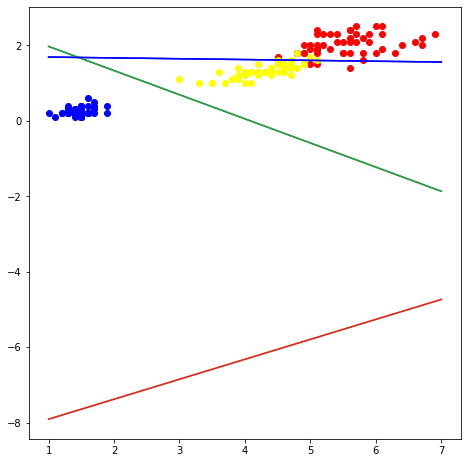

In [85]:
fig

In [73]:
X

,x0,petal_length,petal_width
0,1,1.4,0.2
1,1,1.4,0.2
2,1,1.3,0.2
3,1,1.5,0.2
4,1,1.4,0.2
...,...,...,...
145,1,5.2,2.3
146,1,5.0,1.9
147,1,5.2,2.0
148,1,5.4,2.3


In [25]:
X1=df[df["target"]==3]

In [26]:
X1

,sepal_length,sepal_width,petal_length,petal_width,species,target
50,7.0,3.2,4.7,1.4,Iris-versicolor,3
51,6.4,3.2,4.5,1.5,Iris-versicolor,3
52,6.9,3.1,4.9,1.5,Iris-versicolor,3
53,5.5,2.3,4.0,1.3,Iris-versicolor,3
54,6.5,2.8,4.6,1.5,Iris-versicolor,3
55,5.7,2.8,4.5,1.3,Iris-versicolor,3
56,6.3,3.3,4.7,1.6,Iris-versicolor,3
57,4.9,2.4,3.3,1.0,Iris-versicolor,3
58,6.6,2.9,4.6,1.3,Iris-versicolor,3
59,5.2,2.7,3.9,1.4,Iris-versicolor,3


In [27]:
X1.reset_index(inplace=True)

In [33]:
X1.drop(["index",'species'],axis=1,inplace=True)

KeyError: "['index' 'species'] not found in axis"

In [34]:
X1

,sepal_length,sepal_width,petal_length,petal_width,target
0,7.0,3.2,4.7,1.4,3
1,6.4,3.2,4.5,1.5,3
2,6.9,3.1,4.9,1.5,3
3,5.5,2.3,4.0,1.3,3
4,6.5,2.8,4.6,1.5,3
5,5.7,2.8,4.5,1.3,3
6,6.3,3.3,4.7,1.6,3
7,4.9,2.4,3.3,1.0,3
8,6.6,2.9,4.6,1.3,3
9,5.2,2.7,3.9,1.4,3


In [36]:
X1.drop(['sepal_length','sepal_width'],axis=1,inplace=True)

In [37]:
X1

,petal_length,petal_width,target
0,4.7,1.4,3
1,4.5,1.5,3
2,4.9,1.5,3
3,4.0,1.3,3
4,4.6,1.5,3
5,4.5,1.3,3
6,4.7,1.6,3
7,3.3,1.0,3
8,4.6,1.3,3
9,3.9,1.4,3


In [13]:
X1=pd.DataFrame()

In [14]:
X1['x0']=[1 for i in df['target']]

In [15]:
X1['petal_length']=df['petal_length']

In [16]:
X1['petal_width']=df["petal_width"]

In [17]:
X1

,x0,petal_length,petal_width
0,1,1.4,0.2
1,1,1.4,0.2
2,1,1.3,0.2
3,1,1.5,0.2
4,1,1.4,0.2
...,...,...,...
145,1,5.2,2.3
146,1,5.0,1.9
147,1,5.2,2.0
148,1,5.4,2.3


In [18]:
Y1=[1 if i==2 else 0 for i in df["target"]]

In [19]:
X1["petal_length_sq"]=np.array(X1['petal_length'])**2

In [20]:
X1["petal_width_sq"]=np.array(X1['petal_width'])**2

In [28]:
X1

,x0,petal_length,petal_width,petal_length_sq,petal_width_sq
0,1,1.4,0.2,1.96,0.04
1,1,1.4,0.2,1.96,0.04
2,1,1.3,0.2,1.69,0.04
3,1,1.5,0.2,2.25,0.04
4,1,1.4,0.2,1.96,0.04
...,...,...,...,...,...
145,1,5.2,2.3,27.04,5.29
146,1,5.0,1.9,25.00,3.61
147,1,5.2,2.0,27.04,4.00
148,1,5.4,2.3,29.16,5.29


In [22]:
X1a=np.array(X1)

In [23]:
Y1a=np.array(Y1).reshape(150,1)

In [26]:
theta1=logisticreg(X1a,Y1a)

derivative [[ 0.16666667]
 [ 0.02866667]
 [-0.076     ]
 [-1.7644    ]
 [-0.3852    ]]
derivative [[ 0.24249057]
 [ 0.40942953]
 [ 0.05488826]
 [ 0.23537299]
 [-0.14000361]]
derivative [[ 0.24249057]
 [ 0.40942953]
 [ 0.05488826]
 [ 0.23537299]
 [-0.14000361]]
derivative [[ 0.22912051]
 [ 0.34527997]
 [ 0.03311326]
 [-0.09418917]
 [-0.17993371]]
derivative [[ 0.22912051]
 [ 0.34527997]
 [ 0.03311326]
 [-0.09418917]
 [-0.17993371]]
derivative [[ 0.23008069]
 [ 0.35235422]
 [ 0.03576605]
 [-0.05197042]
 [-0.1743616 ]]
derivative [[ 0.23008069]
 [ 0.35235422]
 [ 0.03576605]
 [-0.05197042]
 [-0.1743616 ]]
derivative [[ 0.22920229]
 [ 0.35027597]
 [ 0.03527891]
 [-0.0575741 ]
 [-0.17464331]]
derivative [[ 0.22920229]
 [ 0.35027597]
 [ 0.03527891]
 [-0.0575741 ]
 [-0.17464331]]
derivative [[ 0.2285774 ]
 [ 0.34945199]
 [ 0.03522135]
 [-0.05664324]
 [-0.17412644]]
derivative [[ 0.2285774 ]
 [ 0.34945199]
 [ 0.03522135]
 [-0.05664324]
 [-0.17412644]]
derivative [[ 0.22792043]
 [ 0.34846197]
 [

derivative [[ 0.19943412]
 [ 0.30621729]
 [ 0.03044748]
 [-0.04989656]
 [-0.1552615 ]]
derivative [[ 0.19943412]
 [ 0.30621729]
 [ 0.03044748]
 [-0.04989656]
 [-0.1552615 ]]
derivative [[ 0.19887537]
 [ 0.30538988]
 [ 0.03035736]
 [-0.04976507]
 [-0.15489694]]
derivative [[ 0.19887537]
 [ 0.30538988]
 [ 0.03035736]
 [-0.04976507]
 [-0.15489694]]
derivative [[ 0.19831858]
 [ 0.30456541]
 [ 0.03026761]
 [-0.04963403]
 [-0.15453354]]
derivative [[ 0.19831858]
 [ 0.30456541]
 [ 0.03026761]
 [-0.04963403]
 [-0.15453354]]
derivative [[ 0.19776375]
 [ 0.30374389]
 [ 0.03017822]
 [-0.04950343]
 [-0.15417131]]
derivative [[ 0.19776375]
 [ 0.30374389]
 [ 0.03017822]
 [-0.04950343]
 [-0.15417131]]
derivative [[ 0.19721089]
 [ 0.30292531]
 [ 0.0300892 ]
 [-0.04937328]
 [-0.15381024]]
derivative [[ 0.19721089]
 [ 0.30292531]
 [ 0.0300892 ]
 [-0.04937328]
 [-0.15381024]]
derivative [[ 0.19665998]
 [ 0.30210967]
 [ 0.03000054]
 [-0.04924358]
 [-0.15345033]]
derivative [[ 0.19665998]
 [ 0.30210967]
 [

derivative [[ 0.17477663]
 [ 0.26973687]
 [ 0.02651922]
 [-0.044079  ]
 [-0.1390474 ]]
derivative [[ 0.17430836]
 [ 0.2690446 ]
 [ 0.0264456 ]
 [-0.0439682 ]
 [-0.13873667]]
derivative [[ 0.17430836]
 [ 0.2690446 ]
 [ 0.0264456 ]
 [-0.0439682 ]
 [-0.13873667]]
derivative [[ 0.17384187]
 [ 0.26835497]
 [ 0.0263723 ]
 [-0.04385781]
 [-0.13842701]]
derivative [[ 0.17384187]
 [ 0.26835497]
 [ 0.0263723 ]
 [-0.04385781]
 [-0.13842701]]
derivative [[ 0.17337714]
 [ 0.26766798]
 [ 0.02629931]
 [-0.04374782]
 [-0.1381184 ]]
derivative [[ 0.17337714]
 [ 0.26766798]
 [ 0.02629931]
 [-0.04374782]
 [-0.1381184 ]]
derivative [[ 0.17291419]
 [ 0.26698361]
 [ 0.02622663]
 [-0.04363824]
 [-0.13781085]]
derivative [[ 0.17291419]
 [ 0.26698361]
 [ 0.02622663]
 [-0.04363824]
 [-0.13781085]]
derivative [[ 0.17245299]
 [ 0.26630185]
 [ 0.02615427]
 [-0.04352907]
 [-0.13750436]]
derivative [[ 0.17245299]
 [ 0.26630185]
 [ 0.02615427]
 [-0.04352907]
 [-0.13750436]]
derivative [[ 0.17199355]
 [ 0.26562271]
 [

derivative [[ 0.15420817]
 [ 0.23933933]
 [ 0.02332097]
 [-0.03919946]
 [-0.12527946]]
derivative [[ 0.15420817]
 [ 0.23933933]
 [ 0.02332097]
 [-0.03919946]
 [-0.12527946]]
derivative [[ 0.15381888]
 [ 0.23876411]
 [ 0.02326114]
 [-0.03910684]
 [-0.12501633]]
derivative [[ 0.15381888]
 [ 0.23876411]
 [ 0.02326114]
 [-0.03910684]
 [-0.12501633]]
derivative [[ 0.15343109]
 [ 0.23819111]
 [ 0.02320158]
 [-0.03901457]
 [-0.1247541 ]]
derivative [[ 0.15343109]
 [ 0.23819111]
 [ 0.02320158]
 [-0.03901457]
 [-0.1247541 ]]
derivative [[ 0.1530448 ]
 [ 0.23762033]
 [ 0.02314227]
 [-0.03892264]
 [-0.12449279]]
derivative [[ 0.1530448 ]
 [ 0.23762033]
 [ 0.02314227]
 [-0.03892264]
 [-0.12449279]]
derivative [[ 0.15266   ]
 [ 0.23705175]
 [ 0.02308321]
 [-0.03883106]
 [-0.12423238]]
derivative [[ 0.15266   ]
 [ 0.23705175]
 [ 0.02308321]
 [-0.03883106]
 [-0.12423238]]
derivative [[ 0.15227669]
 [ 0.23648536]
 [ 0.02302441]
 [-0.03873982]
 [-0.12397288]]
derivative [[ 0.15227669]
 [ 0.23648536]
 [

derivative [[ 0.13551286]
 [ 0.21171104]
 [ 0.02047825]
 [-0.03473896]
 [-0.11251769]]
derivative [[ 0.13551286]
 [ 0.21171104]
 [ 0.02047825]
 [-0.03473896]
 [-0.11251769]]
derivative [[ 0.13519538]
 [ 0.21124171]
 [ 0.02043051]
 [-0.03466298]
 [-0.11229862]]
derivative [[ 0.13519538]
 [ 0.21124171]
 [ 0.02043051]
 [-0.03466298]
 [-0.11229862]]
derivative [[ 0.13487912]
 [ 0.21077417]
 [ 0.02038298]
 [-0.03458729]
 [-0.11208029]]
derivative [[ 0.13487912]
 [ 0.21077417]
 [ 0.02038298]
 [-0.03458729]
 [-0.11208029]]
derivative [[ 0.13456405]
 [ 0.21030839]
 [ 0.02033564]
 [-0.03451187]
 [-0.1118627 ]]
derivative [[ 0.13456405]
 [ 0.21030839]
 [ 0.02033564]
 [-0.03451187]
 [-0.1118627 ]]
derivative [[ 0.13425018]
 [ 0.20984437]
 [ 0.0202885 ]
 [-0.03443673]
 [-0.11164586]]
derivative [[ 0.13425018]
 [ 0.20984437]
 [ 0.0202885 ]
 [-0.03443673]
 [-0.11164586]]
derivative [[ 0.1339375 ]
 [ 0.2093821 ]
 [ 0.02024155]
 [-0.03436186]
 [-0.11142976]]
derivative [[ 0.1339375 ]
 [ 0.2093821 ]
 [

derivative [[ 0.12075436]
 [ 0.18988232]
 [ 0.01827833]
 [-0.03119785]
 [-0.1022387 ]]
derivative [[ 0.12075436]
 [ 0.18988232]
 [ 0.01827833]
 [-0.03119785]
 [-0.1022387 ]]
derivative [[ 0.12049206]
 [ 0.18949411]
 [ 0.01823959]
 [-0.03113474]
 [-0.10205416]]
derivative [[ 0.12049206]
 [ 0.18949411]
 [ 0.01823959]
 [-0.03113474]
 [-0.10205416]]
derivative [[ 0.12023073]
 [ 0.1891073 ]
 [ 0.018201  ]
 [-0.03107186]
 [-0.10187024]]
derivative [[ 0.12023073]
 [ 0.1891073 ]
 [ 0.018201  ]
 [-0.03107186]
 [-0.10187024]]
derivative [[ 0.11997035]
 [ 0.1887219 ]
 [ 0.01816257]
 [-0.0310092 ]
 [-0.10168691]]
derivative [[ 0.11997035]
 [ 0.1887219 ]
 [ 0.01816257]
 [-0.0310092 ]
 [-0.10168691]]
derivative [[ 0.11971093]
 [ 0.1883379 ]
 [ 0.01812429]
 [-0.03094676]
 [-0.10150419]]
derivative [[ 0.11971093]
 [ 0.1883379 ]
 [ 0.01812429]
 [-0.03094676]
 [-0.10150419]]
derivative [[ 0.11945245]
 [ 0.18795529]
 [ 0.01808616]
 [-0.03088455]
 [-0.10132207]]
derivative [[ 0.11945245]
 [ 0.18795529]
 [

derivative [[ 0.10851713]
 [ 0.17175622]
 [ 0.01648412]
 [-0.02824643]
 [-0.09355263]]
derivative [[ 0.10829872]
 [ 0.17143239]
 [ 0.01645234]
 [-0.02819362]
 [-0.0933961 ]]
derivative [[ 0.10829872]
 [ 0.17143239]
 [ 0.01645234]
 [-0.02819362]
 [-0.0933961 ]]
derivative [[ 0.10808107]
 [ 0.17110968]
 [ 0.01642069]
 [-0.02814098]
 [-0.09324006]]
derivative [[ 0.10808107]
 [ 0.17110968]
 [ 0.01642069]
 [-0.02814098]
 [-0.09324006]]
derivative [[ 0.10786417]
 [ 0.17078809]
 [ 0.01638915]
 [-0.02808852]
 [-0.09308452]]
derivative [[ 0.10786417]
 [ 0.17078809]
 [ 0.01638915]
 [-0.02808852]
 [-0.09308452]]
derivative [[ 0.10764804]
 [ 0.1704676 ]
 [ 0.01635773]
 [-0.02803624]
 [-0.09292946]]
derivative [[ 0.10764804]
 [ 0.1704676 ]
 [ 0.01635773]
 [-0.02803624]
 [-0.09292946]]
derivative [[ 0.10743266]
 [ 0.17014823]
 [ 0.01632643]
 [-0.02798414]
 [-0.09277489]]
derivative [[ 0.10743266]
 [ 0.17014823]
 [ 0.01632643]
 [-0.02798414]
 [-0.09277489]]
derivative [[ 0.10721802]
 [ 0.16982995]
 [

derivative [[ 0.09791778]
 [ 0.15602542]
 [ 0.01495196]
 [-0.02567739]
 [-0.0858901 ]]
derivative [[ 0.09773549]
 [ 0.15575455]
 [ 0.01492579]
 [-0.0256331 ]
 [-0.08575707]]
derivative [[ 0.09773549]
 [ 0.15575455]
 [ 0.01492579]
 [-0.0256331 ]
 [-0.08575707]]
derivative [[ 0.0975538 ]
 [ 0.15548457]
 [ 0.0148997 ]
 [-0.02558895]
 [-0.08562444]]
derivative [[ 0.0975538 ]
 [ 0.15548457]
 [ 0.0148997 ]
 [-0.02558895]
 [-0.08562444]]
derivative [[ 0.09737271]
 [ 0.15521546]
 [ 0.01487372]
 [-0.02554494]
 [-0.0854922 ]]
derivative [[ 0.09737271]
 [ 0.15521546]
 [ 0.01487372]
 [-0.02554494]
 [-0.0854922 ]]
derivative [[ 0.09719222]
 [ 0.15494724]
 [ 0.01484782]
 [-0.02550107]
 [-0.08536036]]
derivative [[ 0.09719222]
 [ 0.15494724]
 [ 0.01484782]
 [-0.02550107]
 [-0.08536036]]
derivative [[ 0.09701232]
 [ 0.15467989]
 [ 0.01482201]
 [-0.02545734]
 [-0.08522891]]
derivative [[ 0.09701232]
 [ 0.15467989]
 [ 0.01482201]
 [-0.02545734]
 [-0.08522891]]
derivative [[ 0.09683302]
 [ 0.15441341]
 [

derivative [[ 0.08918374]
 [ 0.14303287]
 [ 0.01370459]
 [-0.02355058]
 [-0.07946497]]
derivative [[ 0.0890296 ]
 [ 0.14280327]
 [ 0.0136827 ]
 [-0.02351296]
 [-0.07935059]]
derivative [[ 0.0890296 ]
 [ 0.14280327]
 [ 0.0136827 ]
 [-0.02351296]
 [-0.07935059]]
derivative [[ 0.08887594]
 [ 0.14257439]
 [ 0.01366088]
 [-0.02347545]
 [-0.07923654]]
derivative [[ 0.08887594]
 [ 0.14257439]
 [ 0.01366088]
 [-0.02347545]
 [-0.07923654]]
derivative [[ 0.08872276]
 [ 0.14234621]
 [ 0.01363913]
 [-0.02343806]
 [-0.07912281]]
derivative [[ 0.08872276]
 [ 0.14234621]
 [ 0.01363913]
 [-0.02343806]
 [-0.07912281]]
derivative [[ 0.08857006]
 [ 0.14211873]
 [ 0.01361746]
 [-0.02340078]
 [-0.0790094 ]]
derivative [[ 0.08857006]
 [ 0.14211873]
 [ 0.01361746]
 [-0.02340078]
 [-0.0790094 ]]
derivative [[ 0.08841784]
 [ 0.14189195]
 [ 0.01359585]
 [-0.02336361]
 [-0.0788963 ]]
derivative [[ 0.08841784]
 [ 0.14189195]
 [ 0.01359585]
 [-0.02336361]
 [-0.0788963 ]]
derivative [[ 0.08826609]
 [ 0.14166587]
 [

derivative [[ 0.08150297]
 [ 0.13157762]
 [ 0.01261878]
 [-0.02167201]
 [-0.07372071]]
derivative [[ 0.0813722 ]
 [ 0.1313823 ]
 [ 0.01260038]
 [-0.02163995]
 [-0.07362208]]
derivative [[ 0.0813722 ]
 [ 0.1313823 ]
 [ 0.01260038]
 [-0.02163995]
 [-0.07362208]]
derivative [[ 0.08124181]
 [ 0.13118755]
 [ 0.01258204]
 [-0.02160799]
 [-0.07352372]]
derivative [[ 0.08124181]
 [ 0.13118755]
 [ 0.01258204]
 [-0.02160799]
 [-0.07352372]]
derivative [[ 0.08111181]
 [ 0.13099336]
 [ 0.01256375]
 [-0.02157611]
 [-0.07342562]]
derivative [[ 0.08111181]
 [ 0.13099336]
 [ 0.01256375]
 [-0.02157611]
 [-0.07342562]]
derivative [[ 0.08098219]
 [ 0.13079974]
 [ 0.01254553]
 [-0.02154433]
 [-0.07332778]]
derivative [[ 0.08098219]
 [ 0.13079974]
 [ 0.01254553]
 [-0.02154433]
 [-0.07332778]]
derivative [[ 0.08085296]
 [ 0.13060667]
 [ 0.01252736]
 [-0.02151264]
 [-0.07323019]]
derivative [[ 0.08085296]
 [ 0.13060667]
 [ 0.01252736]
 [-0.02151264]
 [-0.07323019]]
derivative [[ 0.0807241 ]
 [ 0.13041417]
 [

derivative [[ 0.07529478]
 [ 0.1222933 ]
 [ 0.01174857]
 [-0.02014736]
 [-0.0690058 ]]
derivative [[ 0.07529478]
 [ 0.1222933 ]
 [ 0.01174857]
 [-0.02014736]
 [-0.0690058 ]]
derivative [[ 0.07518184]
 [ 0.12212416]
 [ 0.0117328 ]
 [-0.02011957]
 [-0.06891938]]
derivative [[ 0.07518184]
 [ 0.12212416]
 [ 0.0117328 ]
 [-0.02011957]
 [-0.06891938]]
derivative [[ 0.07506921]
 [ 0.12195548]
 [ 0.01171707]
 [-0.02009185]
 [-0.06883319]]
derivative [[ 0.07506921]
 [ 0.12195548]
 [ 0.01171707]
 [-0.02009185]
 [-0.06883319]]
derivative [[ 0.0749569 ]
 [ 0.12178727]
 [ 0.0117014 ]
 [-0.02006421]
 [-0.0687472 ]]
derivative [[ 0.0749569 ]
 [ 0.12178727]
 [ 0.0117014 ]
 [-0.02006421]
 [-0.0687472 ]]
derivative [[ 0.07484491]
 [ 0.12161951]
 [ 0.01168576]
 [-0.02003664]
 [-0.06866144]]
derivative [[ 0.07484491]
 [ 0.12161951]
 [ 0.01168576]
 [-0.02003664]
 [-0.06866144]]
derivative [[ 0.07473322]
 [ 0.12145221]
 [ 0.01167018]
 [-0.02000915]
 [-0.06857589]]
derivative [[ 0.07473322]
 [ 0.12145221]
 [

derivative [[ 0.07001125]
 [ 0.11437023]
 [ 0.01101304]
 [-0.01884496]
 [-0.06493694]]
derivative [[ 0.06991268]
 [ 0.1142222 ]
 [ 0.01099937]
 [-0.01882061]
 [-0.06486051]]
derivative [[ 0.06991268]
 [ 0.1142222 ]
 [ 0.01099937]
 [-0.01882061]
 [-0.06486051]]
derivative [[ 0.06981437]
 [ 0.11407456]
 [ 0.01098572]
 [-0.01879633]
 [-0.06478426]]
derivative [[ 0.06981437]
 [ 0.11407456]
 [ 0.01098572]
 [-0.01879633]
 [-0.06478426]]
derivative [[ 0.06971632]
 [ 0.1139273 ]
 [ 0.01097212]
 [-0.01877212]
 [-0.06470819]]
derivative [[ 0.06971632]
 [ 0.1139273 ]
 [ 0.01097212]
 [-0.01877212]
 [-0.06470819]]
derivative [[ 0.06961853]
 [ 0.11378042]
 [ 0.01095856]
 [-0.01874796]
 [-0.0646323 ]]
derivative [[ 0.06961853]
 [ 0.11378042]
 [ 0.01095856]
 [-0.01874796]
 [-0.0646323 ]]
derivative [[ 0.069521  ]
 [ 0.11363392]
 [ 0.01094503]
 [-0.01872387]
 [-0.06455659]]
derivative [[ 0.069521  ]
 [ 0.11363392]
 [ 0.01094503]
 [-0.01872387]
 [-0.06455659]]
derivative [[ 0.06942372]
 [ 0.1134878 ]
 [

derivative [[ 0.06521117]
 [ 0.10715181]
 [ 0.01034871]
 [-0.01765751]
 [-0.06119112]]
derivative [[ 0.06521117]
 [ 0.10715181]
 [ 0.01034871]
 [-0.01765751]
 [-0.06119112]]
derivative [[ 0.06512497]
 [ 0.10702198]
 [ 0.01033682]
 [-0.01763614]
 [-0.0611234 ]]
derivative [[ 0.06512497]
 [ 0.10702198]
 [ 0.01033682]
 [-0.01763614]
 [-0.0611234 ]]
derivative [[ 0.06503899]
 [ 0.10689248]
 [ 0.01032495]
 [-0.01761483]
 [-0.06105583]]
derivative [[ 0.06503899]
 [ 0.10689248]
 [ 0.01032495]
 [-0.01761483]
 [-0.06105583]]
derivative [[ 0.06495322]
 [ 0.10676329]
 [ 0.01031312]
 [-0.01759357]
 [-0.06098841]]
derivative [[ 0.06495322]
 [ 0.10676329]
 [ 0.01031312]
 [-0.01759357]
 [-0.06098841]]
derivative [[ 0.06486766]
 [ 0.10663441]
 [ 0.01030131]
 [-0.01757236]
 [-0.06092115]]
derivative [[ 0.06486766]
 [ 0.10663441]
 [ 0.01030131]
 [-0.01757236]
 [-0.06092115]]
derivative [[ 0.06478232]
 [ 0.10650585]
 [ 0.01028954]
 [-0.01755121]
 [-0.06085403]]
derivative [[ 0.06478232]
 [ 0.10650585]
 [

derivative [[ 0.06122797]
 [ 0.1011448 ]
 [ 0.00980013]
 [-0.01666882]
 [-0.05804388]]
derivative [[ 0.06115152]
 [ 0.10102933]
 [ 0.00978963]
 [-0.01664981]
 [-0.0579831 ]]
derivative [[ 0.06115152]
 [ 0.10102933]
 [ 0.00978963]
 [-0.01664981]
 [-0.0579831 ]]
derivative [[ 0.06107524]
 [ 0.10091413]
 [ 0.00977915]
 [-0.01663084]
 [-0.05792246]]
derivative [[ 0.06107524]
 [ 0.10091413]
 [ 0.00977915]
 [-0.01663084]
 [-0.05792246]]
derivative [[ 0.06099915]
 [ 0.1007992 ]
 [ 0.00976869]
 [-0.01661192]
 [-0.05786194]]
derivative [[ 0.06099915]
 [ 0.1007992 ]
 [ 0.00976869]
 [-0.01661192]
 [-0.05786194]]
derivative [[ 0.06092324]
 [ 0.10068454]
 [ 0.00975826]
 [-0.01659304]
 [-0.05780156]]
derivative [[ 0.06092324]
 [ 0.10068454]
 [ 0.00975826]
 [-0.01659304]
 [-0.05780156]]
derivative [[ 0.06084751]
 [ 0.10057014]
 [ 0.00974786]
 [-0.01657421]
 [-0.0577413 ]]
derivative [[ 0.06084751]
 [ 0.10057014]
 [ 0.00974786]
 [-0.01657421]
 [-0.0577413 ]]
derivative [[ 0.06077196]
 [ 0.100456  ]
 [

derivative [[ 0.05775348]
 [ 0.09589057]
 [ 0.00932351]
 [-0.01580373]
 [-0.05526728]]
derivative [[ 0.05775348]
 [ 0.09589057]
 [ 0.00932351]
 [-0.01580373]
 [-0.05526728]]
derivative [[ 0.05768512]
 [ 0.09578704]
 [ 0.00931415]
 [-0.01578668]
 [-0.05521235]]
derivative [[ 0.05768512]
 [ 0.09578704]
 [ 0.00931415]
 [-0.01578668]
 [-0.05521235]]
derivative [[ 0.05761691]
 [ 0.09568375]
 [ 0.00930481]
 [-0.01576967]
 [-0.05515752]]
derivative [[ 0.05761691]
 [ 0.09568375]
 [ 0.00930481]
 [-0.01576967]
 [-0.05515752]]
derivative [[ 0.05754886]
 [ 0.09558069]
 [ 0.00929549]
 [-0.0157527 ]
 [-0.05510281]]
derivative [[ 0.05754886]
 [ 0.09558069]
 [ 0.00929549]
 [-0.0157527 ]
 [-0.05510281]]
derivative [[ 0.05748097]
 [ 0.09547785]
 [ 0.0092862 ]
 [-0.01573577]
 [-0.05504821]]
derivative [[ 0.05748097]
 [ 0.09547785]
 [ 0.0092862 ]
 [-0.01573577]
 [-0.05504821]]
derivative [[ 0.05741323]
 [ 0.09537524]
 [ 0.00927692]
 [-0.01571887]
 [-0.05499372]]
derivative [[ 0.05741323]
 [ 0.09537524]
 [

derivative [[ 0.05451646]
 [ 0.09098183]
 [ 0.00888096]
 [-0.01499536]
 [-0.05265212]]
derivative [[ 0.05445529]
 [ 0.09088894]
 [ 0.00887261]
 [-0.01498006]
 [-0.05260243]]
derivative [[ 0.05445529]
 [ 0.09088894]
 [ 0.00887261]
 [-0.01498006]
 [-0.05260243]]
derivative [[ 0.05439426]
 [ 0.09079625]
 [ 0.00886428]
 [-0.0149648 ]
 [-0.05255283]]
derivative [[ 0.05439426]
 [ 0.09079625]
 [ 0.00886428]
 [-0.0149648 ]
 [-0.05255283]]
derivative [[ 0.05433335]
 [ 0.09070374]
 [ 0.00885596]
 [-0.01494956]
 [-0.05250333]]
derivative [[ 0.05433335]
 [ 0.09070374]
 [ 0.00885596]
 [-0.01494956]
 [-0.05250333]]
derivative [[ 0.05427258]
 [ 0.09061144]
 [ 0.00884767]
 [-0.01493436]
 [-0.05245393]]
derivative [[ 0.05427258]
 [ 0.09061144]
 [ 0.00884767]
 [-0.01493436]
 [-0.05245393]]
derivative [[ 0.05421194]
 [ 0.09051933]
 [ 0.0088394 ]
 [-0.01491919]
 [-0.05240463]]
derivative [[ 0.05421194]
 [ 0.09051933]
 [ 0.0088394 ]
 [-0.01491919]
 [-0.05240463]]
derivative [[ 0.05415144]
 [ 0.09042741]
 [

derivative [[ 0.05161283]
 [ 0.08656619]
 [ 0.00848514]
 [-0.01426813]
 [-0.05028126]]
derivative [[ 0.05161283]
 [ 0.08656619]
 [ 0.00848514]
 [-0.01426813]
 [-0.05028126]]
derivative [[ 0.05155782]
 [ 0.08648241]
 [ 0.00847765]
 [-0.01425433]
 [-0.05023611]]
derivative [[ 0.05155782]
 [ 0.08648241]
 [ 0.00847765]
 [-0.01425433]
 [-0.05023611]]
derivative [[ 0.05150293]
 [ 0.0863988 ]
 [ 0.00847018]
 [-0.01424056]
 [-0.05019103]]
derivative [[ 0.05150293]
 [ 0.0863988 ]
 [ 0.00847018]
 [-0.01424056]
 [-0.05019103]]
derivative [[ 0.05144814]
 [ 0.08631536]
 [ 0.00846272]
 [-0.01422682]
 [-0.05014604]]
derivative [[ 0.05144814]
 [ 0.08631536]
 [ 0.00846272]
 [-0.01422682]
 [-0.05014604]]
derivative [[ 0.05139347]
 [ 0.08623208]
 [ 0.00845528]
 [-0.01421311]
 [-0.05010114]]
derivative [[ 0.05139347]
 [ 0.08623208]
 [ 0.00845528]
 [-0.01421311]
 [-0.05010114]]
derivative [[ 0.05133892]
 [ 0.08614897]
 [ 0.00844785]
 [-0.01419942]
 [-0.05005632]]
derivative [[ 0.05133892]
 [ 0.08614897]
 [

derivative [[ 0.04899544]
 [ 0.08257459]
 [ 0.0081292 ]
 [-0.01361075]
 [-0.04812231]]
derivative [[ 0.04899544]
 [ 0.08257459]
 [ 0.0081292 ]
 [-0.01361075]
 [-0.04812231]]
derivative [[ 0.04894574]
 [ 0.08249867]
 [ 0.00812245]
 [-0.01359825]
 [-0.0480811 ]]
derivative [[ 0.04894574]
 [ 0.08249867]
 [ 0.00812245]
 [-0.01359825]
 [-0.0480811 ]]
derivative [[ 0.04889613]
 [ 0.0824229 ]
 [ 0.00811571]
 [-0.01358577]
 [-0.04803996]]
derivative [[ 0.04889613]
 [ 0.0824229 ]
 [ 0.00811571]
 [-0.01358577]
 [-0.04803996]]
derivative [[ 0.04884662]
 [ 0.08234728]
 [ 0.00810899]
 [-0.01357331]
 [-0.0479989 ]]
derivative [[ 0.04884662]
 [ 0.08234728]
 [ 0.00810899]
 [-0.01357331]
 [-0.0479989 ]]
derivative [[ 0.0487972 ]
 [ 0.0822718 ]
 [ 0.00810228]
 [-0.01356088]
 [-0.0479579 ]]
derivative [[ 0.0487972 ]
 [ 0.0822718 ]
 [ 0.00810228]
 [-0.01356088]
 [-0.0479579 ]]
derivative [[ 0.04874789]
 [ 0.08219646]
 [ 0.00809558]
 [-0.01354848]
 [-0.04791699]]
derivative [[ 0.04874789]
 [ 0.08219646]
 [

derivative [[ 0.04658023]
 [ 0.07888087]
 [ 0.00780143]
 [-0.01300249]
 [-0.04611046]]
derivative [[ 0.04653521]
 [ 0.07881191]
 [ 0.00779532]
 [-0.01299113]
 [-0.04607277]]
derivative [[ 0.04653521]
 [ 0.07881191]
 [ 0.00779532]
 [-0.01299113]
 [-0.04607277]]
derivative [[ 0.04649027]
 [ 0.07874307]
 [ 0.00778923]
 [-0.0129798 ]
 [-0.04603514]]
derivative [[ 0.04649027]
 [ 0.07874307]
 [ 0.00778923]
 [-0.0129798 ]
 [-0.04603514]]
derivative [[ 0.04644541]
 [ 0.07867437]
 [ 0.00778315]
 [-0.01296848]
 [-0.04599757]]
derivative [[ 0.04644541]
 [ 0.07867437]
 [ 0.00778315]
 [-0.01296848]
 [-0.04599757]]
derivative [[ 0.04640064]
 [ 0.07860578]
 [ 0.00777708]
 [-0.01295719]
 [-0.04596007]]
derivative [[ 0.04640064]
 [ 0.07860578]
 [ 0.00777708]
 [-0.01295719]
 [-0.04596007]]
derivative [[ 0.04635595]
 [ 0.07853733]
 [ 0.00777102]
 [-0.01294592]
 [-0.04592263]]
derivative [[ 0.04635595]
 [ 0.07853733]
 [ 0.00777102]
 [-0.01294592]
 [-0.04592263]]
derivative [[ 0.04631135]
 [ 0.07846899]
 [

derivative [[ 0.044388  ]
 [ 0.07551865]
 [ 0.00750441]
 [-0.01244891]
 [-0.04426688]]
derivative [[ 0.044388  ]
 [ 0.07551865]
 [ 0.00750441]
 [-0.01244891]
 [-0.04426688]]
derivative [[ 0.04434705]
 [ 0.07545574]
 [ 0.00749887]
 [-0.01243856]
 [-0.04423228]]
derivative [[ 0.04434705]
 [ 0.07545574]
 [ 0.00749887]
 [-0.01243856]
 [-0.04423228]]
derivative [[ 0.04430616]
 [ 0.07539294]
 [ 0.00749333]
 [-0.01242822]
 [-0.04419772]]
derivative [[ 0.04430616]
 [ 0.07539294]
 [ 0.00749333]
 [-0.01242822]
 [-0.04419772]]
derivative [[ 0.04426536]
 [ 0.07533026]
 [ 0.00748781]
 [-0.0124179 ]
 [-0.04416323]]
derivative [[ 0.04426536]
 [ 0.07533026]
 [ 0.00748781]
 [-0.0124179 ]
 [-0.04416323]]
derivative [[ 0.04422462]
 [ 0.07526768]
 [ 0.00748229]
 [-0.0124076 ]
 [-0.04412879]]
derivative [[ 0.04422462]
 [ 0.07526768]
 [ 0.00748229]
 [-0.0124076 ]
 [-0.04412879]]
derivative [[ 0.04418396]
 [ 0.07520522]
 [ 0.00747679]
 [-0.01239732]
 [-0.04409441]]
derivative [[ 0.04418396]
 [ 0.07520522]
 [

derivative [[ 0.04250271]
 [ 0.07261926]
 [ 0.00724932]
 [-0.01197166]
 [-0.04266726]]
derivative [[ 0.04250271]
 [ 0.07261926]
 [ 0.00724932]
 [-0.01197166]
 [-0.04266726]]
derivative [[ 0.04246511]
 [ 0.07256136]
 [ 0.00724423]
 [-0.01196213]
 [-0.04263523]]
derivative [[ 0.04246511]
 [ 0.07256136]
 [ 0.00724423]
 [-0.01196213]
 [-0.04263523]]
derivative [[ 0.04242758]
 [ 0.07250356]
 [ 0.00723916]
 [-0.01195262]
 [-0.04260324]]
derivative [[ 0.04242758]
 [ 0.07250356]
 [ 0.00723916]
 [-0.01195262]
 [-0.04260324]]
derivative [[ 0.04239011]
 [ 0.07244585]
 [ 0.00723409]
 [-0.01194312]
 [-0.0425713 ]]
derivative [[ 0.04239011]
 [ 0.07244585]
 [ 0.00723409]
 [-0.01194312]
 [-0.0425713 ]]
derivative [[ 0.04235271]
 [ 0.07238825]
 [ 0.00722903]
 [-0.01193364]
 [-0.04253941]]
derivative [[ 0.04235271]
 [ 0.07238825]
 [ 0.00722903]
 [-0.01193364]
 [-0.04253941]]
derivative [[ 0.04231538]
 [ 0.07233074]
 [ 0.00722399]
 [-0.01192418]
 [-0.04250757]]
derivative [[ 0.04231538]
 [ 0.07233074]
 [

derivative [[ 0.04063123]
 [ 0.06973326]
 [ 0.00699636]
 [-0.01149676]
 [-0.04106559]]
derivative [[ 0.04063123]
 [ 0.06973326]
 [ 0.00699636]
 [-0.01149676]
 [-0.04106559]]
derivative [[ 0.04059684]
 [ 0.06968015]
 [ 0.00699171]
 [-0.01148802]
 [-0.04103603]]
derivative [[ 0.04059684]
 [ 0.06968015]
 [ 0.00699171]
 [-0.01148802]
 [-0.04103603]]
derivative [[ 0.04056251]
 [ 0.06962712]
 [ 0.00698707]
 [-0.0114793 ]
 [-0.04100651]]
derivative [[ 0.04056251]
 [ 0.06962712]
 [ 0.00698707]
 [-0.0114793 ]
 [-0.04100651]]
derivative [[ 0.04052823]
 [ 0.06957418]
 [ 0.00698244]
 [-0.01147059]
 [-0.04097703]]
derivative [[ 0.04052823]
 [ 0.06957418]
 [ 0.00698244]
 [-0.01147059]
 [-0.04097703]]
derivative [[ 0.04049401]
 [ 0.06952133]
 [ 0.00697782]
 [-0.01146189]
 [-0.0409476 ]]
derivative [[ 0.04049401]
 [ 0.06952133]
 [ 0.00697782]
 [-0.01146189]
 [-0.0409476 ]]
derivative [[ 0.04045985]
 [ 0.06946856]
 [ 0.0069732 ]
 [-0.01145321]
 [-0.04091821]]
derivative [[ 0.04045985]
 [ 0.06946856]
 [

derivative [[ 0.03901143]
 [ 0.06722853]
 [ 0.00677759]
 [-0.01108474]
 [-0.03966756]]
derivative [[ 0.0389797 ]
 [ 0.06717941]
 [ 0.00677331]
 [-0.01107666]
 [-0.03964007]]
derivative [[ 0.0389797 ]
 [ 0.06717941]
 [ 0.00677331]
 [-0.01107666]
 [-0.03964007]]
derivative [[ 0.03894803]
 [ 0.06713037]
 [ 0.00676904]
 [-0.0110686 ]
 [-0.03961262]]
derivative [[ 0.03894803]
 [ 0.06713037]
 [ 0.00676904]
 [-0.0110686 ]
 [-0.03961262]]
derivative [[ 0.03891641]
 [ 0.0670814 ]
 [ 0.00676477]
 [-0.01106054]
 [-0.03958521]]
derivative [[ 0.03891641]
 [ 0.0670814 ]
 [ 0.00676477]
 [-0.01106054]
 [-0.03958521]]
derivative [[ 0.03888485]
 [ 0.06703251]
 [ 0.00676051]
 [-0.0110525 ]
 [-0.03955784]]
derivative [[ 0.03888485]
 [ 0.06703251]
 [ 0.00676051]
 [-0.0110525 ]
 [-0.03955784]]
derivative [[ 0.03885333]
 [ 0.0669837 ]
 [ 0.00675625]
 [-0.01104447]
 [-0.0395305 ]]
derivative [[ 0.03885333]
 [ 0.0669837 ]
 [ 0.00675625]
 [-0.01104447]
 [-0.0395305 ]]
derivative [[ 0.03882186]
 [ 0.06693496]
 [

derivative [[ 0.03748587]
 [ 0.06486329]
 [ 0.00657168]
 [-0.01069582]
 [-0.03834033]]
derivative [[ 0.03745657]
 [ 0.0648178 ]
 [ 0.00656773]
 [-0.01068834]
 [-0.03831473]]
derivative [[ 0.03745657]
 [ 0.0648178 ]
 [ 0.00656773]
 [-0.01068834]
 [-0.03831473]]
derivative [[ 0.03742732]
 [ 0.06477238]
 [ 0.00656378]
 [-0.01068088]
 [-0.03828918]]
derivative [[ 0.03742732]
 [ 0.06477238]
 [ 0.00656378]
 [-0.01068088]
 [-0.03828918]]
derivative [[ 0.03739811]
 [ 0.06472703]
 [ 0.00655984]
 [-0.01067342]
 [-0.03826365]]
derivative [[ 0.03739811]
 [ 0.06472703]
 [ 0.00655984]
 [-0.01067342]
 [-0.03826365]]
derivative [[ 0.03736895]
 [ 0.06468175]
 [ 0.0065559 ]
 [-0.01066598]
 [-0.03823817]]
derivative [[ 0.03736895]
 [ 0.06468175]
 [ 0.0065559 ]
 [-0.01066598]
 [-0.03823817]]
derivative [[ 0.03733983]
 [ 0.06463654]
 [ 0.00655197]
 [-0.01065854]
 [-0.03821272]]
derivative [[ 0.03733983]
 [ 0.06463654]
 [ 0.00655197]
 [-0.01065854]
 [-0.03821272]]
derivative [[ 0.03731076]
 [ 0.06459139]
 [

derivative [[ 0.03604776]
 [ 0.06262767]
 [ 0.00637765]
 [-0.01032838]
 [-0.03707926]]
derivative [[ 0.03604776]
 [ 0.06262767]
 [ 0.00637765]
 [-0.01032838]
 [-0.03707926]]
derivative [[ 0.03602066]
 [ 0.06258549]
 [ 0.00637399]
 [-0.01032144]
 [-0.03705541]]
derivative [[ 0.03602066]
 [ 0.06258549]
 [ 0.00637399]
 [-0.01032144]
 [-0.03705541]]
derivative [[ 0.0359936 ]
 [ 0.06254337]
 [ 0.00637034]
 [-0.01031452]
 [-0.03703158]]
derivative [[ 0.0359936 ]
 [ 0.06254337]
 [ 0.00637034]
 [-0.01031452]
 [-0.03703158]]
derivative [[ 0.03596659]
 [ 0.06250131]
 [ 0.0063667 ]
 [-0.01030761]
 [-0.03700779]]
derivative [[ 0.03596659]
 [ 0.06250131]
 [ 0.0063667 ]
 [-0.01030761]
 [-0.03700779]]
derivative [[ 0.03593961]
 [ 0.06245931]
 [ 0.00636306]
 [-0.01030071]
 [-0.03698403]]
derivative [[ 0.03593961]
 [ 0.06245931]
 [ 0.00636306]
 [-0.01030071]
 [-0.03698403]]
derivative [[ 0.03591268]
 [ 0.06241737]
 [ 0.00635943]
 [-0.01029382]
 [-0.0369603 ]]
derivative [[ 0.03591268]
 [ 0.06241737]
 [

derivative [[ 0.03479156]
 [ 0.06066979]
 [ 0.0062082 ]
 [-0.01000673]
 [-0.03596943]]
derivative [[ 0.03479156]
 [ 0.06066979]
 [ 0.0062082 ]
 [-0.01000673]
 [-0.03596943]]
derivative [[ 0.03476632]
 [ 0.0606304 ]
 [ 0.0062048 ]
 [-0.01000026]
 [-0.03594706]]
derivative [[ 0.03476632]
 [ 0.0606304 ]
 [ 0.0062048 ]
 [-0.01000026]
 [-0.03594706]]
derivative [[ 0.03474112]
 [ 0.06059107]
 [ 0.0062014 ]
 [-0.0099938 ]
 [-0.0359247 ]]
derivative [[ 0.03474112]
 [ 0.06059107]
 [ 0.0062014 ]
 [-0.0099938 ]
 [-0.0359247 ]]
derivative [[ 0.03471595]
 [ 0.06055179]
 [ 0.006198  ]
 [-0.00998735]
 [-0.03590238]]
derivative [[ 0.03471595]
 [ 0.06055179]
 [ 0.006198  ]
 [-0.00998735]
 [-0.03590238]]
derivative [[ 0.03469083]
 [ 0.06051257]
 [ 0.00619461]
 [-0.00998091]
 [-0.03588009]]
derivative [[ 0.03469083]
 [ 0.06051257]
 [ 0.00619461]
 [-0.00998091]
 [-0.03588009]]
derivative [[ 0.03466573]
 [ 0.06047341]
 [ 0.00619123]
 [-0.00997448]
 [-0.03585783]]
derivative [[ 0.03466573]
 [ 0.06047341]
 [

derivative [[ 0.03354962]
 [ 0.05872917]
 [ 0.00604069]
 [-0.00968808]
 [-0.0348642 ]]
derivative [[ 0.03354962]
 [ 0.05872917]
 [ 0.00604069]
 [-0.00968808]
 [-0.0348642 ]]
derivative [[ 0.03352615]
 [ 0.05869246]
 [ 0.00603752]
 [-0.00968205]
 [-0.03484324]]
derivative [[ 0.03352615]
 [ 0.05869246]
 [ 0.00603752]
 [-0.00968205]
 [-0.03484324]]
derivative [[ 0.03350272]
 [ 0.0586558 ]
 [ 0.00603436]
 [-0.00967603]
 [-0.03482231]]
derivative [[ 0.03350272]
 [ 0.0586558 ]
 [ 0.00603436]
 [-0.00967603]
 [-0.03482231]]
derivative [[ 0.03347933]
 [ 0.05861919]
 [ 0.00603121]
 [-0.00967002]
 [-0.03480141]]
derivative [[ 0.03347933]
 [ 0.05861919]
 [ 0.00603121]
 [-0.00967002]
 [-0.03480141]]
derivative [[ 0.03345596]
 [ 0.05858263]
 [ 0.00602806]
 [-0.00966402]
 [-0.03478053]]
derivative [[ 0.03345596]
 [ 0.05858263]
 [ 0.00602806]
 [-0.00966402]
 [-0.03478053]]
derivative [[ 0.03343263]
 [ 0.05854612]
 [ 0.00602491]
 [-0.00965803]
 [-0.03475968]]
derivative [[ 0.03343263]
 [ 0.05854612]
 [

derivative [[ 0.03243753]
 [ 0.05698704]
 [ 0.00589068]
 [-0.00940217]
 [-0.03386746]]
derivative [[ 0.03243753]
 [ 0.05698704]
 [ 0.00589068]
 [-0.00940217]
 [-0.03386746]]
derivative [[ 0.03241561]
 [ 0.05695265]
 [ 0.00588773]
 [-0.00939653]
 [-0.03384774]]
derivative [[ 0.03241561]
 [ 0.05695265]
 [ 0.00588773]
 [-0.00939653]
 [-0.03384774]]
derivative [[ 0.03239372]
 [ 0.05691831]
 [ 0.00588477]
 [-0.00939089]
 [-0.03382804]]
derivative [[ 0.03239372]
 [ 0.05691831]
 [ 0.00588477]
 [-0.00939089]
 [-0.03382804]]
derivative [[ 0.03237185]
 [ 0.05688401]
 [ 0.00588182]
 [-0.00938526]
 [-0.03380837]]
derivative [[ 0.03237185]
 [ 0.05688401]
 [ 0.00588182]
 [-0.00938526]
 [-0.03380837]]
derivative [[ 0.03235002]
 [ 0.05684976]
 [ 0.00587888]
 [-0.00937964]
 [-0.03378872]]
derivative [[ 0.03235002]
 [ 0.05684976]
 [ 0.00587888]
 [-0.00937964]
 [-0.03378872]]
derivative [[ 0.03232821]
 [ 0.05681555]
 [ 0.00587594]
 [-0.00937403]
 [-0.0337691 ]]
derivative [[ 0.03232821]
 [ 0.05681555]
 [

derivative [[ 0.0313563 ]
 [ 0.05528896]
 [ 0.00574481]
 [-0.00912364]
 [-0.03289162]]
derivative [[ 0.0313563 ]
 [ 0.05528896]
 [ 0.00574481]
 [-0.00912364]
 [-0.03289162]]
derivative [[ 0.03133582]
 [ 0.05525676]
 [ 0.00574205]
 [-0.00911836]
 [-0.03287308]]
derivative [[ 0.03133582]
 [ 0.05525676]
 [ 0.00574205]
 [-0.00911836]
 [-0.03287308]]
derivative [[ 0.03131538]
 [ 0.05522461]
 [ 0.00573929]
 [-0.00911309]
 [-0.03285456]]
derivative [[ 0.03131538]
 [ 0.05522461]
 [ 0.00573929]
 [-0.00911309]
 [-0.03285456]]
derivative [[ 0.03129496]
 [ 0.05519249]
 [ 0.00573654]
 [-0.00910782]
 [-0.03283606]]
derivative [[ 0.03129496]
 [ 0.05519249]
 [ 0.00573654]
 [-0.00910782]
 [-0.03283606]]
derivative [[ 0.03127456]
 [ 0.05516042]
 [ 0.00573378]
 [-0.00910256]
 [-0.03281758]]
derivative [[ 0.03127456]
 [ 0.05516042]
 [ 0.00573378]
 [-0.00910256]
 [-0.03281758]]
derivative [[ 0.0312542 ]
 [ 0.05512838]
 [ 0.00573104]
 [-0.00909731]
 [-0.03279912]]
derivative [[ 0.0312542 ]
 [ 0.05512838]
 [

derivative [[ 0.03034547]
 [ 0.05369743]
 [ 0.0056084 ]
 [-0.00886274]
 [-0.03197305]]
derivative [[ 0.03034547]
 [ 0.05369743]
 [ 0.0056084 ]
 [-0.00886274]
 [-0.03197305]]
derivative [[ 0.03032631]
 [ 0.05366722]
 [ 0.00560581]
 [-0.00885779]
 [-0.03195557]]
derivative [[ 0.03032631]
 [ 0.05366722]
 [ 0.00560581]
 [-0.00885779]
 [-0.03195557]]
derivative [[ 0.03030717]
 [ 0.05363704]
 [ 0.00560323]
 [-0.00885284]
 [-0.03193812]]
derivative [[ 0.03030717]
 [ 0.05363704]
 [ 0.00560323]
 [-0.00885284]
 [-0.03193812]]
derivative [[ 0.03028806]
 [ 0.05360691]
 [ 0.00560065]
 [-0.0088479 ]
 [-0.03192069]]
derivative [[ 0.03028806]
 [ 0.05360691]
 [ 0.00560065]
 [-0.0088479 ]
 [-0.03192069]]
derivative [[ 0.03026897]
 [ 0.05357681]
 [ 0.00559807]
 [-0.00884297]
 [-0.03190327]]
derivative [[ 0.03026897]
 [ 0.05357681]
 [ 0.00559807]
 [-0.00884297]
 [-0.03190327]]
derivative [[ 0.03024991]
 [ 0.05354675]
 [ 0.0055955 ]
 [-0.00883804]
 [-0.03188588]]
derivative [[ 0.03024991]
 [ 0.05354675]
 [

derivative [[ 0.0294706 ]
 [ 0.05231663]
 [ 0.00549028]
 [-0.00863651]
 [-0.03117289]]
derivative [[ 0.02945254]
 [ 0.05228809]
 [ 0.00548785]
 [-0.00863184]
 [-0.03115632]]
derivative [[ 0.02945254]
 [ 0.05228809]
 [ 0.00548785]
 [-0.00863184]
 [-0.03115632]]
derivative [[ 0.02943451]
 [ 0.05225959]
 [ 0.00548541]
 [-0.00862717]
 [-0.03113977]]
derivative [[ 0.02943451]
 [ 0.05225959]
 [ 0.00548541]
 [-0.00862717]
 [-0.03113977]]
derivative [[ 0.02941649]
 [ 0.05223112]
 [ 0.00548298]
 [-0.00862251]
 [-0.03112324]]
derivative [[ 0.02941649]
 [ 0.05223112]
 [ 0.00548298]
 [-0.00862251]
 [-0.03112324]]
derivative [[ 0.0293985 ]
 [ 0.05220269]
 [ 0.00548055]
 [-0.00861785]
 [-0.03110672]]
derivative [[ 0.0293985 ]
 [ 0.05220269]
 [ 0.00548055]
 [-0.00861785]
 [-0.03110672]]
derivative [[ 0.02938053]
 [ 0.05217429]
 [ 0.00547812]
 [-0.0086132 ]
 [-0.03109023]]
derivative [[ 0.02938053]
 [ 0.05217429]
 [ 0.00547812]
 [-0.0086132 ]
 [-0.03109023]]
derivative [[ 0.02936258]
 [ 0.05214592]
 [

derivative [[ 0.02862837]
 [ 0.05098427]
 [ 0.00537652]
 [-0.00841834]
 [-0.03039789]]
derivative [[ 0.02862837]
 [ 0.05098427]
 [ 0.00537652]
 [-0.00841834]
 [-0.03039789]]
derivative [[ 0.02861134]
 [ 0.0509573 ]
 [ 0.00537422]
 [-0.00841393]
 [-0.03038217]]
derivative [[ 0.02861134]
 [ 0.0509573 ]
 [ 0.00537422]
 [-0.00841393]
 [-0.03038217]]
derivative [[ 0.02859433]
 [ 0.05093037]
 [ 0.00537193]
 [-0.00840952]
 [-0.03036647]]
derivative [[ 0.02859433]
 [ 0.05093037]
 [ 0.00537193]
 [-0.00840952]
 [-0.03036647]]
derivative [[ 0.02857735]
 [ 0.05090346]
 [ 0.00536963]
 [-0.00840512]
 [-0.03035079]]
derivative [[ 0.02857735]
 [ 0.05090346]
 [ 0.00536963]
 [-0.00840512]
 [-0.03035079]]
derivative [[ 0.02856038]
 [ 0.05087659]
 [ 0.00536734]
 [-0.00840072]
 [-0.03033512]]
derivative [[ 0.02856038]
 [ 0.05087659]
 [ 0.00536734]
 [-0.00840072]
 [-0.03033512]]
derivative [[ 0.02854344]
 [ 0.05084974]
 [ 0.00536505]
 [-0.00839632]
 [-0.03031947]]
derivative [[ 0.02854344]
 [ 0.05084974]
 [

derivative [[ 0.02781756]
 [ 0.04969864]
 [ 0.00526694]
 [-0.00820795]
 [-0.02964727]]
derivative [[ 0.0278015 ]
 [ 0.04967314]
 [ 0.00526477]
 [-0.00820378]
 [-0.02963236]]
derivative [[ 0.0278015 ]
 [ 0.04967314]
 [ 0.00526477]
 [-0.00820378]
 [-0.02963236]]
derivative [[ 0.02778545]
 [ 0.04964767]
 [ 0.0052626 ]
 [-0.00819961]
 [-0.02961746]]
derivative [[ 0.02778545]
 [ 0.04964767]
 [ 0.0052626 ]
 [-0.00819961]
 [-0.02961746]]
derivative [[ 0.02776943]
 [ 0.04962223]
 [ 0.00526044]
 [-0.00819545]
 [-0.02960257]]
derivative [[ 0.02776943]
 [ 0.04962223]
 [ 0.00526044]
 [-0.00819545]
 [-0.02960257]]
derivative [[ 0.02775343]
 [ 0.04959682]
 [ 0.00525827]
 [-0.0081913 ]
 [-0.02958771]]
derivative [[ 0.02775343]
 [ 0.04959682]
 [ 0.00525827]
 [-0.0081913 ]
 [-0.02958771]]
derivative [[ 0.02773744]
 [ 0.04957144]
 [ 0.00525611]
 [-0.00818714]
 [-0.02957285]]
derivative [[ 0.02773744]
 [ 0.04957144]
 [ 0.00525611]
 [-0.00818714]
 [-0.02957285]]
derivative [[ 0.02772147]
 [ 0.04954608]
 [

derivative [[ 0.02702183]
 [ 0.04843392]
 [ 0.00515933]
 [-0.00800111]
 [-0.02890612]]
derivative [[ 0.02700669]
 [ 0.04840983]
 [ 0.00515728]
 [-0.00799717]
 [-0.02889198]]
derivative [[ 0.02700669]
 [ 0.04840983]
 [ 0.00515728]
 [-0.00799717]
 [-0.02889198]]
derivative [[ 0.02699157]
 [ 0.04838576]
 [ 0.00515524]
 [-0.00799324]
 [-0.02887785]]
derivative [[ 0.02699157]
 [ 0.04838576]
 [ 0.00515524]
 [-0.00799324]
 [-0.02887785]]
derivative [[ 0.02697646]
 [ 0.04836172]
 [ 0.00515319]
 [-0.00798931]
 [-0.02886373]]
derivative [[ 0.02697646]
 [ 0.04836172]
 [ 0.00515319]
 [-0.00798931]
 [-0.02886373]]
derivative [[ 0.02696137]
 [ 0.04833771]
 [ 0.00515115]
 [-0.00798538]
 [-0.02884963]]
derivative [[ 0.02696137]
 [ 0.04833771]
 [ 0.00515115]
 [-0.00798538]
 [-0.02884963]]
derivative [[ 0.0269463 ]
 [ 0.04831373]
 [ 0.00514911]
 [-0.00798146]
 [-0.02883554]]
derivative [[ 0.0269463 ]
 [ 0.04831373]
 [ 0.00514911]
 [-0.00798146]
 [-0.02883554]]
derivative [[ 0.02693125]
 [ 0.04828976]
 [

derivative [[ 0.02631415]
 [ 0.04730654]
 [ 0.00506355]
 [-0.00781684]
 [-0.02824309]]
derivative [[ 0.02631415]
 [ 0.04730654]
 [ 0.00506355]
 [-0.00781684]
 [-0.02824309]]
derivative [[ 0.02629981]
 [ 0.04728366]
 [ 0.00506161]
 [-0.00781311]
 [-0.02822962]]
derivative [[ 0.02629981]
 [ 0.04728366]
 [ 0.00506161]
 [-0.00781311]
 [-0.02822962]]
derivative [[ 0.02628548]
 [ 0.04726081]
 [ 0.00505967]
 [-0.00780937]
 [-0.02821615]]
derivative [[ 0.02628548]
 [ 0.04726081]
 [ 0.00505967]
 [-0.00780937]
 [-0.02821615]]
derivative [[ 0.02627117]
 [ 0.04723799]
 [ 0.00505773]
 [-0.00780564]
 [-0.02820271]]
derivative [[ 0.02627117]
 [ 0.04723799]
 [ 0.00505773]
 [-0.00780564]
 [-0.02820271]]
derivative [[ 0.02625688]
 [ 0.04721519]
 [ 0.0050558 ]
 [-0.00780192]
 [-0.02818927]]
derivative [[ 0.02625688]
 [ 0.04721519]
 [ 0.0050558 ]
 [-0.00780192]
 [-0.02818927]]
derivative [[ 0.0262426 ]
 [ 0.04719241]
 [ 0.00505386]
 [-0.0077982 ]
 [-0.02817585]]
derivative [[ 0.0262426 ]
 [ 0.04719241]
 [

derivative [[ 0.02561612]
 [ 0.046192  ]
 [ 0.004969  ]
 [-0.00763479]
 [-0.02758538]]
derivative [[ 0.02560255]
 [ 0.0461703 ]
 [ 0.00496717]
 [-0.00763125]
 [-0.02757255]]
derivative [[ 0.02560255]
 [ 0.0461703 ]
 [ 0.00496717]
 [-0.00763125]
 [-0.02757255]]
derivative [[ 0.02558899]
 [ 0.04614863]
 [ 0.00496533]
 [-0.00762771]
 [-0.02755973]]
derivative [[ 0.02558899]
 [ 0.04614863]
 [ 0.00496533]
 [-0.00762771]
 [-0.02755973]]
derivative [[ 0.02557544]
 [ 0.04612697]
 [ 0.00496349]
 [-0.00762417]
 [-0.02754693]]
derivative [[ 0.02557544]
 [ 0.04612697]
 [ 0.00496349]
 [-0.00762417]
 [-0.02754693]]
derivative [[ 0.02556191]
 [ 0.04610534]
 [ 0.00496166]
 [-0.00762064]
 [-0.02753414]]
derivative [[ 0.02556191]
 [ 0.04610534]
 [ 0.00496166]
 [-0.00762064]
 [-0.02753414]]
derivative [[ 0.0255484 ]
 [ 0.04608373]
 [ 0.00495983]
 [-0.00761711]
 [-0.02752136]]
derivative [[ 0.0255484 ]
 [ 0.04608373]
 [ 0.00495983]
 [-0.00761711]
 [-0.02752136]]
derivative [[ 0.02553489]
 [ 0.04606214]
 [

derivative [[ 0.02496783]
 [ 0.04515454]
 [ 0.00488112]
 [-0.00746543]
 [-0.02697109]]
derivative [[ 0.02495495]
 [ 0.0451339 ]
 [ 0.00487937]
 [-0.00746207]
 [-0.02695885]]
derivative [[ 0.02495495]
 [ 0.0451339 ]
 [ 0.00487937]
 [-0.00746207]
 [-0.02695885]]
derivative [[ 0.02494209]
 [ 0.04511329]
 [ 0.00487762]
 [-0.0074587 ]
 [-0.02694662]]
derivative [[ 0.02494209]
 [ 0.04511329]
 [ 0.00487762]
 [-0.0074587 ]
 [-0.02694662]]
derivative [[ 0.02492923]
 [ 0.04509269]
 [ 0.00487588]
 [-0.00745534]
 [-0.02693441]]
derivative [[ 0.02492923]
 [ 0.04509269]
 [ 0.00487588]
 [-0.00745534]
 [-0.02693441]]
derivative [[ 0.02491639]
 [ 0.04507212]
 [ 0.00487414]
 [-0.00745198]
 [-0.0269222 ]]
derivative [[ 0.02491639]
 [ 0.04507212]
 [ 0.00487414]
 [-0.00745198]
 [-0.0269222 ]]
derivative [[ 0.02490357]
 [ 0.04505156]
 [ 0.0048724 ]
 [-0.00744863]
 [-0.02691001]]
derivative [[ 0.02490357]
 [ 0.04505156]
 [ 0.0048724 ]
 [-0.00744863]
 [-0.02691001]]
derivative [[ 0.02489075]
 [ 0.04503103]
 [

derivative [[ 0.02435229]
 [ 0.04416729]
 [ 0.00479759]
 [-0.00730438]
 [-0.02638465]]
derivative [[ 0.02435229]
 [ 0.04416729]
 [ 0.00479759]
 [-0.00730438]
 [-0.02638465]]
derivative [[ 0.02434005]
 [ 0.04414764]
 [ 0.00479593]
 [-0.00730117]
 [-0.02637296]]
derivative [[ 0.02434005]
 [ 0.04414764]
 [ 0.00479593]
 [-0.00730117]
 [-0.02637296]]
derivative [[ 0.02432783]
 [ 0.04412801]
 [ 0.00479427]
 [-0.00729797]
 [-0.02636128]]
derivative [[ 0.02432783]
 [ 0.04412801]
 [ 0.00479427]
 [-0.00729797]
 [-0.02636128]]
derivative [[ 0.02431561]
 [ 0.0441084 ]
 [ 0.00479261]
 [-0.00729477]
 [-0.02634961]]
derivative [[ 0.02431561]
 [ 0.0441084 ]
 [ 0.00479261]
 [-0.00729477]
 [-0.02634961]]
derivative [[ 0.02430341]
 [ 0.0440888 ]
 [ 0.00479095]
 [-0.00729158]
 [-0.02633795]]
derivative [[ 0.02430341]
 [ 0.0440888 ]
 [ 0.00479095]
 [-0.00729158]
 [-0.02633795]]
derivative [[ 0.02429123]
 [ 0.04406923]
 [ 0.0047893 ]
 [-0.00728838]
 [-0.0263263 ]]
derivative [[ 0.02429123]
 [ 0.04406923]
 [

derivative [[ 0.0237671 ]
 [ 0.04322666]
 [ 0.0047181 ]
 [-0.00715102]
 [-0.02582416]]
derivative [[ 0.02375546]
 [ 0.04320793]
 [ 0.00471651]
 [-0.00714797]
 [-0.02581298]]
derivative [[ 0.02375546]
 [ 0.04320793]
 [ 0.00471651]
 [-0.00714797]
 [-0.02581298]]
derivative [[ 0.02374383]
 [ 0.04318921]
 [ 0.00471493]
 [-0.00714492]
 [-0.02580181]]
derivative [[ 0.02374383]
 [ 0.04318921]
 [ 0.00471493]
 [-0.00714492]
 [-0.02580181]]
derivative [[ 0.02373221]
 [ 0.04317051]
 [ 0.00471335]
 [-0.00714187]
 [-0.02579065]]
derivative [[ 0.02373221]
 [ 0.04317051]
 [ 0.00471335]
 [-0.00714187]
 [-0.02579065]]
derivative [[ 0.0237206 ]
 [ 0.04315183]
 [ 0.00471178]
 [-0.00713882]
 [-0.0257795 ]]
derivative [[ 0.0237206 ]
 [ 0.04315183]
 [ 0.00471178]
 [-0.00713882]
 [-0.0257795 ]]
derivative [[ 0.023709  ]
 [ 0.04313317]
 [ 0.0047102 ]
 [-0.00713578]
 [-0.02576836]]
derivative [[ 0.023709  ]
 [ 0.04313317]
 [ 0.0047102 ]
 [-0.00713578]
 [-0.02576836]]
derivative [[ 0.02369742]
 [ 0.04311452]
 [

derivative [[ 0.02317685]
 [ 0.04227579]
 [ 0.00463783]
 [-0.0069961 ]
 [-0.0252558 ]]
derivative [[ 0.02317685]
 [ 0.04227579]
 [ 0.00463783]
 [-0.0069961 ]
 [-0.0252558 ]]
derivative [[ 0.0231658 ]
 [ 0.04225796]
 [ 0.00463633]
 [-0.00699319]
 [-0.02524512]]
derivative [[ 0.0231658 ]
 [ 0.04225796]
 [ 0.00463633]
 [-0.00699319]
 [-0.02524512]]
derivative [[ 0.02315475]
 [ 0.04224015]
 [ 0.00463482]
 [-0.00699029]
 [-0.02523446]]
derivative [[ 0.02315475]
 [ 0.04224015]
 [ 0.00463482]
 [-0.00699029]
 [-0.02523446]]
derivative [[ 0.02314372]
 [ 0.04222235]
 [ 0.00463332]
 [-0.00698739]
 [-0.0252238 ]]
derivative [[ 0.02314372]
 [ 0.04222235]
 [ 0.00463332]
 [-0.00698739]
 [-0.0252238 ]]
derivative [[ 0.0231327 ]
 [ 0.04220457]
 [ 0.00463182]
 [-0.00698449]
 [-0.02521315]]
derivative [[ 0.0231327 ]
 [ 0.04220457]
 [ 0.00463182]
 [-0.00698449]
 [-0.02521315]]
derivative [[ 0.02312168]
 [ 0.0421868 ]
 [ 0.00463032]
 [-0.0069816 ]
 [-0.02520252]]
derivative [[ 0.02312168]
 [ 0.0421868 ]
 [

derivative [[ 0.02265815]
 [ 0.04143834]
 [ 0.00456721]
 [-0.00685974]
 [-0.02475373]]
derivative [[ 0.02265815]
 [ 0.04143834]
 [ 0.00456721]
 [-0.00685974]
 [-0.02475373]]
derivative [[ 0.0226476 ]
 [ 0.04142129]
 [ 0.00456578]
 [-0.00685696]
 [-0.02474349]]
derivative [[ 0.0226476 ]
 [ 0.04142129]
 [ 0.00456578]
 [-0.00685696]
 [-0.02474349]]
derivative [[ 0.02263705]
 [ 0.04140425]
 [ 0.00456434]
 [-0.00685419]
 [-0.02473326]]
derivative [[ 0.02263705]
 [ 0.04140425]
 [ 0.00456434]
 [-0.00685419]
 [-0.02473326]]
derivative [[ 0.02262652]
 [ 0.04138722]
 [ 0.0045629 ]
 [-0.00685142]
 [-0.02472303]]
derivative [[ 0.02262652]
 [ 0.04138722]
 [ 0.0045629 ]
 [-0.00685142]
 [-0.02472303]]
derivative [[ 0.022616  ]
 [ 0.04137022]
 [ 0.00456147]
 [-0.00684865]
 [-0.02471282]]
derivative [[ 0.022616  ]
 [ 0.04137022]
 [ 0.00456147]
 [-0.00684865]
 [-0.02471282]]
derivative [[ 0.02260549]
 [ 0.04135322]
 [ 0.00456004]
 [-0.00684588]
 [-0.02470261]]
derivative [[ 0.02260549]
 [ 0.04135322]
 [

derivative [[ 0.02214265]
 [ 0.04060431]
 [ 0.00449695]
 [-0.00672402]
 [-0.02425227]]
derivative [[ 0.02213259]
 [ 0.04058801]
 [ 0.00449558]
 [-0.00672137]
 [-0.02424246]]
derivative [[ 0.02213259]
 [ 0.04058801]
 [ 0.00449558]
 [-0.00672137]
 [-0.02424246]]
derivative [[ 0.02212254]
 [ 0.04057173]
 [ 0.0044942 ]
 [-0.00671872]
 [-0.02423265]]
derivative [[ 0.02212254]
 [ 0.04057173]
 [ 0.0044942 ]
 [-0.00671872]
 [-0.02423265]]
derivative [[ 0.02211249]
 [ 0.04055545]
 [ 0.00449283]
 [-0.00671608]
 [-0.02422285]]
derivative [[ 0.02211249]
 [ 0.04055545]
 [ 0.00449283]
 [-0.00671608]
 [-0.02422285]]
derivative [[ 0.02210246]
 [ 0.0405392 ]
 [ 0.00449147]
 [-0.00671343]
 [-0.02421306]]
derivative [[ 0.02210246]
 [ 0.0405392 ]
 [ 0.00449147]
 [-0.00671343]
 [-0.02421306]]
derivative [[ 0.02209243]
 [ 0.04052296]
 [ 0.0044901 ]
 [-0.00671079]
 [-0.02420328]]
derivative [[ 0.02209243]
 [ 0.04052296]
 [ 0.0044901 ]
 [-0.00671079]
 [-0.02420328]]
derivative [[ 0.02208241]
 [ 0.04050673]
 [

In [29]:
theta1

array([[-1.27356131],
       [-2.08487399],
       [-0.20674758],
       [ 0.35768636],
       [ 1.16662685]])

In [74]:
Y1a

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [87]:
listtheta=[ 1.23991775,
        1.22819512,
        0.05943839,
       -0.59567354,
       -0.29515659]

In [81]:
listtheta

[[1.23991775, 1.22819512, 0.05943839, -0.59567354, -0.29515659]]

In [86]:
prob2=[-3.31247903706979, 0.04376621356936832, 1.9379458880008271]

In [89]:
def predict(x1,x2):
    arr=np.array([1,x1,x2,x1**2,x2**2])
    thetaarr=np.array(listtheta)
    output=float(np.matmul(thetaarr.T,arr))
    if output>=0:
        print("iris setosa")
    else :
        arr1=np.array(prob2)
        out=float(np.matmul(arr1.T,np.array([1,x1,x2])))
        if out>=0:
            print("iris virginica")
        else:
            print('Iris-versicolor')

In [93]:
predict(4.5,1.5)

Iris-versicolor
